In [2]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [16]:
def init_vaccination_df_from_zip(path, index_col):
    df_master = pd.read_csv(glob.glob(path)[0], compression='zip', header=0, sep=',', index_col=index_col)
    return df_master

vaccination_df = init_vaccination_df_from_zip(r'**csv_files/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv.zip', ["Date"])
vaccination_df = vaccination_df[vaccination_df["Location"] == "CA"]
vaccination_df.index = pd.to_datetime(vaccination_df.index)
vaccination_df.sort_index(inplace=True)
vaccination_df["Administered"]

Date
2020-12-14           0
2020-12-15           0
2020-12-16           4
2020-12-17         273
2020-12-18         273
                ...   
2022-04-16    74123212
2022-04-17    74232595
2022-04-18    74270938
2022-04-19    74289573
2022-04-20    74358164
Name: Administered, Length: 493, dtype: int64

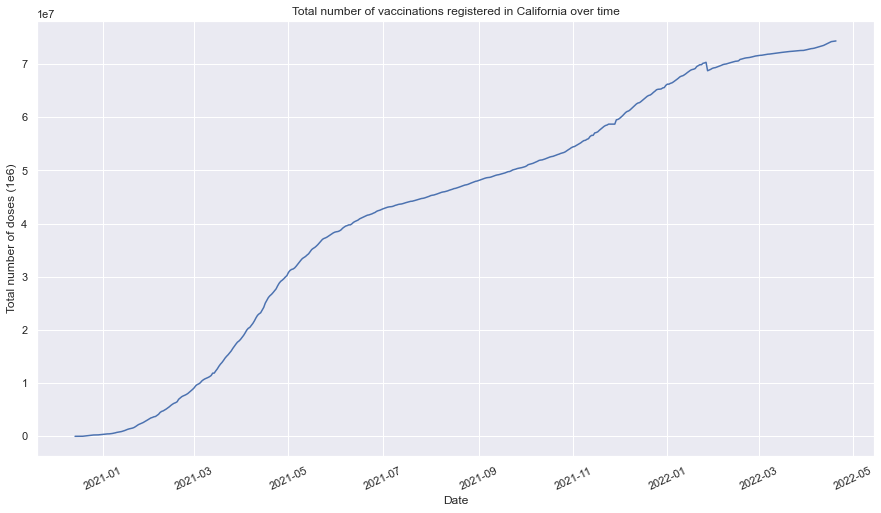

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.lineplot(x = "Date", y = "Administered", data = vaccination_df)
plot.set(xlabel='Date', ylabel='Total number of doses (1e6)')
plot.set_title('Total number of vaccinations registered in California over time');
plt.xticks(rotation = 25);